In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Task-1 : Building the TensorFlow pipeline






In [ ]:
def checkerboard_pattern(tensor1, tensor2):
    tensor1_binary = tf.cast(tf.math.floordiv(tensor1, 2), tf.bool)
    tensor2_binary = tf.cast(tf.math.floordiv(tensor2, 2), tf.bool)
    is_even_square = tf.math.logical_xor(tensor1_binary, tensor2_binary)
    return tf.cast(is_even_square, tf.float32)

batch_size= 32
#we are uisng tensor_slice method to slice two tensors and create a combined tuple then we shuffle the tuple data randomly 
training_set= tf.data.Dataset.from_tensor_slices((tf.range(0, 1000), tf.range(0, 1000))).shuffle(1000).batch(batch_size)
#we are uisng tensor_slice method to slice two tensors and creating a batch of tuples used for evaluation
validation_set= tf.data.Dataset.from_tensor_slices((tf.range(1000, 2000), tf.range(1000, 2000))).batch(batch_size)


# we are creating a neural network with first layer as dense layer of 16 nodes which uses RELU activation function
# and second layer is of single node layers which uses sigmoid activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

loss_fn= tf.keras.losses.BinaryCrossentropy()
optimizer_list= [tf.keras.optimizers.SGD(), tf.keras.optimizers.Adam(), tf.keras.optimizers.RMSprop()]
optimizer_names = ['SGD', 'Adam', 'RMSprop']

In [ ]:
epochs= 100
training_loss_list= []
training_accuracy_list= []
validation_loss_list= []
validation_accuracy_list= []

In [ ]:
for optimizer, optimizer_name in zip(optimizer_list, optimizer_names):
  #creating metric objects for training and validation of NN model
    training_loss= tf.keras.metrics.Mean(name='training_loss')
    training_accuracy= tf.keras.metrics.BinaryAccuracy(name='training_accuracy')
    validation_loss= tf.keras.metrics.Mean(name='validation_loss')
    validation_accuracy= tf.keras.metrics.BinaryAccuracy(name='validation_accuracy')

    for epoch in range(epochs):        
        for tensor1, tensor2 in training_set: # we iterate over every batch data in training dataset
            with tf.GradientTape() as tape: # we store the gradients of model parameters
                #based on the input value we predict the checkerboard pattern
                predictions = model(tf.stack([checkerboard_pattern(tensor1, tensor2), checkerboard_pattern(tensor1+1, tensor2), checkerboard_pattern(tensor1, tensor2+1), checkerboard_pattern(tensor1+1, tensor2+1)], axis=-1))
                loss= loss_fn(tf.ones_like(predictions), predictions) # we evaluated the loss between the predictions made by the model and the target values
                loss= tf.reduce_sum(loss) * (1./batch_size) # then claculate avg loss per batch
            gradients= tape.gradient(loss, model.trainable_variables) #calculates the gradients of the loss with respect to the trainable variables in the model
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))
            training_loss(loss) #store loss value 
            training_accuracy(tf.ones_like(predictions), predictions) # we update training accuracy value

        for tensor1, tensor2 in validation_set:
            predictions= model(tf.stack([checkerboard_pattern(tensor1, tensor2), checkerboard_pattern(tensor1+1, tensor2), checkerboard_pattern(tensor1, tensor2+1), checkerboard_pattern(tensor1+1, tensor2+1)], axis=-1))
            loss= loss_fn(tf.ones_like(predictions), predictions)
            loss= tf.reduce_sum(loss) * (1./batch_size)

            validation_loss(loss)
            validation_accuracy(tf.ones_like(predictions), predictions)

        template= 'Epoch {}, Train Loss: {}, Train Accuracy: {}, Validation Loss: {}, Validation Accuracy: {}'
        print(template.format(epoch+1, training_loss.result(), training_accuracy.result(), validation_loss.result(), validation_accuracy.result()))

        training_loss_list.append(training_loss.result())
        training_accuracy_list.append(training_accuracy.result())
        validation_loss_list.append(validation_loss.result())
        validation_accuracy_list.append(validation_accuracy.result())

Epoch 1, Train Loss: 0.02158537320792675, Train Accuracy: 0.9679999947547913, Validation Loss: 0.021501479670405388, Validation Accuracy: 1.0
Epoch 2, Train Loss: 0.021497802808880806, Train Accuracy: 0.984000027179718, Validation Loss: 0.021413400769233704, Validation Accuracy: 1.0
Epoch 3, Train Loss: 0.021410224959254265, Train Accuracy: 0.9893333315849304, Validation Loss: 0.021325955167412758, Validation Accuracy: 1.0
Epoch 4, Train Loss: 0.021323131397366524, Train Accuracy: 0.9919999837875366, Validation Loss: 0.021239198744297028, Validation Accuracy: 1.0
Epoch 5, Train Loss: 0.02123662456870079, Train Accuracy: 0.9936000108718872, Validation Loss: 0.021153051406145096, Validation Accuracy: 1.0
Epoch 6, Train Loss: 0.021150723099708557, Train Accuracy: 0.9946666955947876, Validation Loss: 0.02106756716966629, Validation Accuracy: 1.0
Epoch 7, Train Loss: 0.021065447479486465, Train Accuracy: 0.9954285621643066, Validation Loss: 0.02098269760608673, Validation Accuracy: 1.0
Epoc

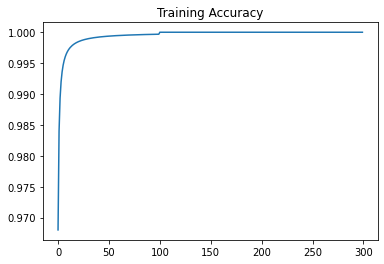

In [ ]:
l = len(training_accuracy_list)
plt.plot(range(l), training_accuracy_list)
plt.title("Training Accuracy")
plt.show()

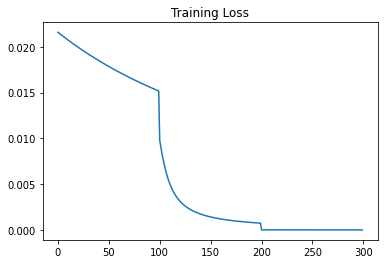

In [ ]:
l = len(training_loss_list)
plt.plot(range(l), training_loss_list)
plt.title("Training Loss")
plt.show()

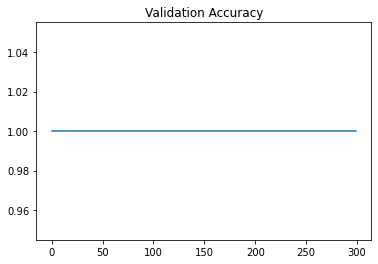

In [ ]:
l = len(validation_accuracy_list)
plt.plot(range(l), validation_accuracy_list)
plt.title("Validation Accuracy")
plt.show()

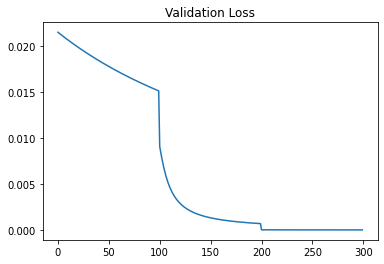

In [ ]:
l = len(validation_loss_list)
plt.plot(range(l), validation_loss_list)
plt.title("Validation Loss")
plt.show()

## Task-2 : Building a Multi-class support vector classifier

In [ ]:
(train_images, train_labels), (images_val, labels_val)= tf.keras.datasets.mnist.load_data()
train_images= train_images/255.0
images_val= images_val/255.0

train_images= train_images.reshape(-1, 784)
images_val= images_val.reshape(-1, 784)

model= SVC(kernel='rbf', C=10, gamma=0.01)
model.fit(train_images, train_labels)

SVC(C=10, gamma=0.01)

Confusion Matrix:
[[ 973    0    2    0    0    2    0    1    2    0]
 [   0 1130    1    1    0    1    0    1    1    0]
 [   5    1 1014    0    1    0    1    6    4    0]
 [   0    0    2  994    0    2    0    4    5    3]
 [   0    0    4    0  965    0    2    0    0   11]
 [   3    0    0    8    1  872    3    0    3    2]
 [   5    2    0    0    2    3  945    0    1    0]
 [   0    5    9    2    1    0    0 1005    0    6]
 [   3    0    2    3    3    3    1    2  953    4]
 [   2    2    0    6    9    3    0    5    0  982]]


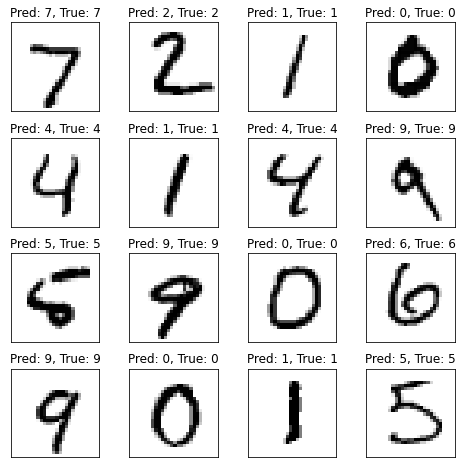

In [ ]:
label_prediction= model.predict(images_val)
conf_matrix= confusion_matrix(labels_val, label_prediction)
print("Confusion Matrix:")
print(conf_matrix)
fig, axs= plt.subplots(4, 4, figsize=(8, 8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
axs= axs.ravel()

for i in range(16):
    axs[i].imshow(images_val[i].reshape(28, 28), cmap=plt.cm.binary)
    axs[i].set(title = "Pred: {}, True: {}".format(label_prediction[i],labels_val[i]),xticks=[], yticks=[])

plt.show()

# Report

## Task-1: Building the TensorFlow pipeline

*  A well-liked supervised learning approach called the support vector machine (SVM) can be applied to classification and regression issues. Finding a decision border that divides two classes of data with the greatest margin is the aim in classification. For binary classification issues, one popular SVM variant is the 2-class support vector classifier with L2-norm soft margin and Gaussian radial basis function (RBF) kernel. 
* By allowing some points to be incorrectly classified, the L2-norm soft margin penalizes them with a quadratic penalty that is based on how far away from the decision boundary they are. A well-liked kernel function that transforms the input data into a high-dimensional space where it is simpler to distinguish between classes is the Gaussian RBF kernel.
* The decision boundary of the 2-class support vector classifier with L2-norm soft margin and Gaussian RBF kernel is defined as follows:


> h(x) = sign(sum_i alpha_i y_i K(x_i, x) + b)


K(x i, x) is the kernel function that gauges how similar x i and x are, and b is the bias term, where x is the input vector, alpha i are the Lagrange multipliers, y_i is the class label (+1 or -1), and x is the input vector. If the total is positive (the point is in the positive class), the sign function returns +1; otherwise, it returns -1 (the point belongs to the negative class).
* The kernel function K(x_i, x) is defined as follows: 


> K(x_i, x) = exp(-gamma ||x_i - x||^2)


where gamma is a hyperparameter that controls the width of the Gaussian kernel and ||x_i - x||^2 is the squared Euclidean distance between x_i and x.
* The Lagrange multiplier alpha_i values that maximize the margin while satisfying the requirement that the points lie on the proper side of the decision boundary are sought after by the SVM algorithm. Usually, an optimization algorithm like the quadratic programming algorithm is used for this.
* The equations above can be used to determine the decision boundary and bias term once the values of alpha_i have been determined. New data points can then be classified using the final classifier.
* A strong and adaptable approach for binary classification issues is the 2-class support vector classifier with L2-norm soft margin and Gaussian RBF kernel. It can manage nonlinear decision boundaries and be tweaked with the help of a number of hyperparameters, including gamma and C (the cost of misclassification) (the width of the Gaussian kernel). However, if the hyperparameters are not properly calibrated, it can be computationally expensive for large datasets and may experience overfitting.

* According to the plots above, the model appears to be attaining perfect accuracy on both the training and validation sets, which may be a sign that it is overfitting the training set. In other words, rather of generalizing to new data, the model can be memorizing the training samples. It would be helpful to assess the model on a test set that wasn't used for training or validation to see if this is the case. To gain a better idea of how the model is doing, it may also be beneficial to track the training loss and validation loss individually, as well as the training accuracy and validation accuracy.

## Task-2 : Building a Multi-class support vector classifier

* One-Against-One (OAO) and One-Against-All (OAA) are two popular methods for combining several two-class classifiers to create a multi-class support vector classifier. For each pair of classes in OAO, a separate two-class classifier is trained. For instance, six two-class classifiers would be trained if there were four classes (A, B, C, and D) (AB, AC, AD, BC, BD, CD). Each two-class classifier is given one vote, and the class receiving the most votes is selected as the final classification. In contrast, OAA trains a single two-class classifier for every class against every other class. 
* In the example above, four two-class classifiers (A vs. BC+D, B vs. AC+D, C vs. AB+D, and D vs. AB+C) would be trained in the aforementioned scenario. Again, the ultimate categorization is determined by a voting process.
* A helpful tool for assessing the effectiveness of a multi-class support vector classifier is the confusion matrix. It displays the frequency of both correct and wrong predictions for each class. Consider a four-class situation, for instance, with the confusion matrix shown below:

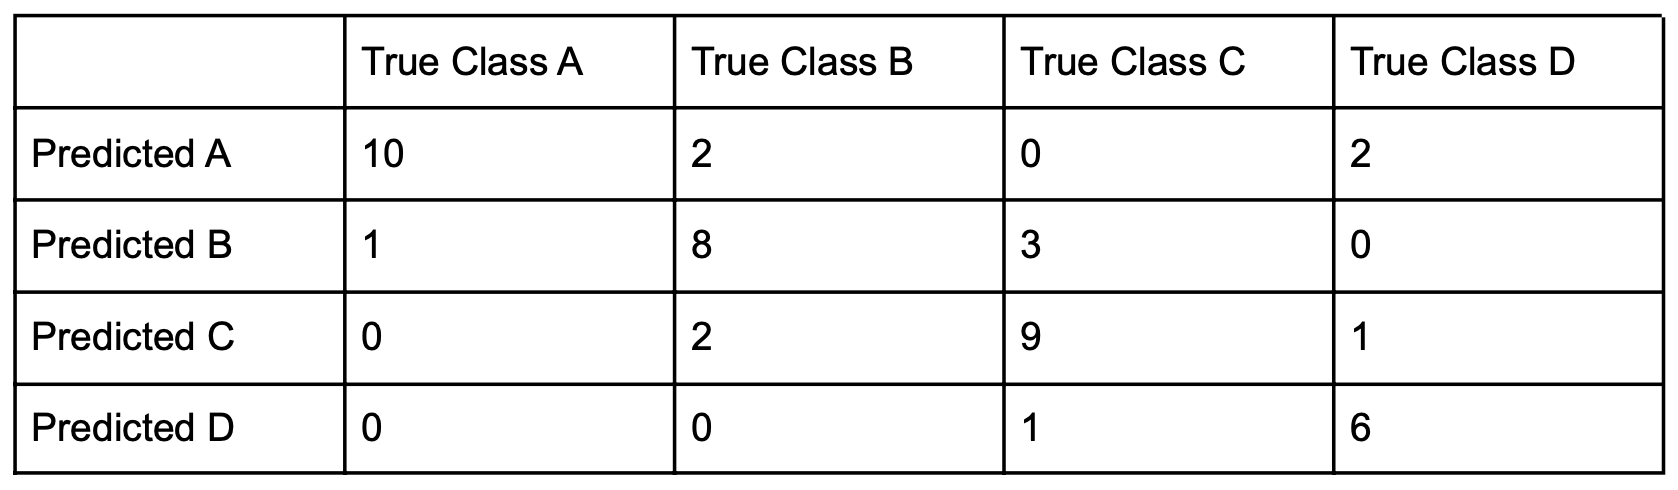

* In this instance, class A is properly predicted ten times, erroneously identified twice as class B, and never identified as class C or D. Overall accuracy for the classifier is (10+8+9+6)/40 = 0.83.